## Sequential Forward Floating Selection (SFS)

In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

### Import dataset

In [2]:
df = pd.read_csv("Finaltest.csv")

In [3]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,date_registration,date_unregistration,final_result
0,1,1,24213,0,0,2,4,0,0,90,...,0,0,0,0,0,0,0,-128,-46,0
1,1,1,40419,1,1,1,2,1,0,60,...,4,3,2,1,3,14,10,-46,171,0
2,1,1,41060,1,2,3,7,0,0,60,...,34,2,5,0,22,87,6,-24,0,1
3,1,1,43284,1,1,1,8,0,2,180,...,47,22,9,2,32,87,36,-28,226,0
4,1,1,45664,1,3,3,6,0,1,60,...,27,0,6,2,54,123,64,-31,0,1


### Drop columns

In [4]:
#df=df.drop(columns='id_student')
df=df.drop(columns='code_module')
df=df.drop(columns='code_presentation')
df=df.drop(columns='date_unregistration')
df=df.drop(columns='date_registration')

In [5]:
df.shape

(1303, 23)

In [6]:
df.isnull().sum()

id_student               0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
total_number_of_click    0
total_score              0
externalquiz             0
forumng                  0
glossary                 0
homepage                 0
oucontent                0
ouelluminate             0
ouwiki                   0
page                     0
resource                 0
subpage                  0
url                      0
final_result             0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,final_result


In [8]:
X = df.iloc[:,0:22]
y = df.iloc[:,-1]

In [9]:
X

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2693243,0,3,1,5,1,0,60,0,2643,...,310,1,163,31,9,24,1,101,360,200
1299,2694933,0,1,2,1,0,0,60,1,935,...,87,0,76,19,16,14,1,45,81,30
1300,2697773,0,0,2,6,0,0,60,0,148,...,14,0,7,1,0,3,2,6,35,18
1301,2707979,0,1,1,6,0,0,120,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: final_result, Length: 1303, dtype: int64

In [11]:
X.head()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64


### Train and Fit dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Sequential Forward Floating Selection

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
X_train.shape

(912, 22)

In [15]:
forward_feature_selection = SequentialFeatureSelector(MLPClassifier(max_iter=2000),
                                                     k_features=22,
                                                     forward=True,
                                                     floating=True,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)
forward_feature_selection.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   11.7s finished

[2022-11-03 01:31:19] Features: 1/22 -- score: 0.8304357384044607[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   24.1s finished

[2022-11-03 01:31:43] Features: 2/22 -- score: 0.8500310235760742[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   38.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   49.9s finished

[2022-11-03 01:49:26] Features: 14/22 -- score: 0.8561754768784775[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   20.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   15.7s finished

[2022-11-03 01:50:03] Features: 15/22 -- score: 0.8512927863845295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: U

{1: {'feature_idx': (10,),
  'cv_scores': array([0.84255319, 0.81954887, 0.84444444, 0.81896552, 0.82666667]),
  'avg_score': 0.8304357384044607,
  'feature_names': ('total_score',)},
 2: {'feature_idx': (10, 17),
  'cv_scores': array([0.87111111, 0.85333333, 0.86343612, 0.82819383, 0.83408072]),
  'avg_score': 0.8500310235760742,
  'feature_names': ('total_score', 'ouwiki')},
 3: {'feature_idx': (4, 10, 17),
  'cv_scores': array([0.85067873, 0.85454545, 0.84070796, 0.87892377, 0.86607143]),
  'avg_score': 0.8581854695132941,
  'feature_names': ('imd_band', 'total_score', 'ouwiki')},
 4: {'feature_idx': (4, 6, 10, 17),
  'cv_scores': array([0.85067873, 0.84821429, 0.85964912, 0.87336245, 0.85333333]),
  'avg_score': 0.8570475840602315,
  'feature_names': ('imd_band',
   'num_of_prev_attempts',
   'total_score',
   'ouwiki')},
 5: {'feature_idx': (4, 6, 10, 12, 17),
  'cv_scores': array([0.86206897, 0.86607143, 0.83982684, 0.84955752, 0.85714286]),
  'avg_score': 0.8549335226364523,
  '

In [16]:
forward_feature_selection.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

In [17]:
forward_feature_selection.k_feature_names_

('id_student',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'total_number_of_click',
 'total_score',
 'externalquiz',
 'forumng',
 'glossary',
 'homepage',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'resource',
 'subpage',
 'url')

In [18]:
forward_feature_selection.k_score_

0.7872317880794701

In [19]:
download=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
download.to_csv("forwardfloating.mlp.csv")
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8425531914893616, 0.8195488721804511, 0.844...",0.830436,"(total_score,)",0.014166,0.011022,0.005511
2,"(10, 17)","[0.8711111111111112, 0.8533333333333334, 0.863...",0.850031,"(total_score, ouwiki)",0.021246,0.01653,0.008265
3,"(4, 10, 17)","[0.8506787330316742, 0.8545454545454545, 0.840...",0.858185,"(imd_band, total_score, ouwiki)",0.016928,0.013171,0.006585
4,"(4, 6, 10, 17)","[0.8506787330316742, 0.8482142857142857, 0.859...",0.857048,"(imd_band, num_of_prev_attempts, total_score, ...",0.011572,0.009004,0.004502
5,"(4, 6, 10, 12, 17)","[0.8620689655172413, 0.8660714285714286, 0.839...",0.854934,"(imd_band, num_of_prev_attempts, total_score, ...",0.012015,0.009348,0.004674
6,"(1, 4, 10, 12, 16, 17)","[0.8620689655172413, 0.8711111111111112, 0.858...",0.859658,"(gender, imd_band, total_score, forumng, ouell...",0.009032,0.007027,0.003514
7,"(1, 4, 6, 10, 12, 16, 17)","[0.8370044052863438, 0.8669527896995708, 0.866...",0.858403,"(gender, imd_band, num_of_prev_attempts, total...",0.016338,0.012712,0.006356
8,"(1, 4, 6, 10, 12, 14, 16, 17)","[0.8534482758620691, 0.8389830508474577, 0.865...",0.852701,"(gender, imd_band, num_of_prev_attempts, total...",0.013408,0.010432,0.005216
9,"(1, 4, 5, 6, 10, 12, 14, 16, 17)","[0.8421052631578947, 0.8648648648648649, 0.860...",0.856194,"(gender, imd_band, age_band, num_of_prev_attem...",0.010851,0.008442,0.004221
10,"(1, 4, 5, 6, 10, 11, 12, 14, 16, 17)","[0.8458149779735683, 0.8571428571428571, 0.847...",0.855155,"(gender, imd_band, age_band, num_of_prev_attem...",0.009959,0.007749,0.003874


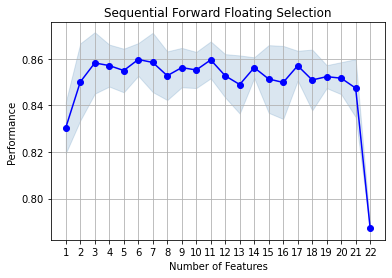

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Floating Selection')
plt.grid()
plt.show()

In [21]:
forward_feature_selection = SequentialFeatureSelector(MLPClassifier(max_iter=2000),
                                                     k_features= (1,22),
                                                     forward=True,
                                                     floating=True,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   12.4s finished

[2022-11-03 01:56:53] Features: 1/22 -- score: 0.83657231307625[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   24.6s finished

[2022-11-03 01:57:18] Features: 2/22 -- score: 0.8487165027869092[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   41.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   50.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  1.1min finished

[2022-11-03 02:19:00] Features: 12/22 -- score: 0.8480845766116237[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   50.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   20.7s finished

[2022-11-03 02:41:37] Features: 20/22 -- score: 0.8481190121830606[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel

In [22]:
forward_feature_selection.k_feature_names_

('gender', 'imd_band', 'total_score', 'forumng', 'homepage', 'ouwiki')

In [23]:
forward_feature_selection.k_score_

0.8598524852998496

In [24]:

pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8461538461538463, 0.823076923076923, 0.8444...",0.836572,"(total_score,)",0.012453,0.009689,0.004845
2,"(10, 17)","[0.8546255506607929, 0.857142857142857, 0.8672...",0.848717,"(total_score, ouwiki)",0.018388,0.014307,0.007153
3,"(4, 10, 17)","[0.8546255506607929, 0.858447488584475, 0.8392...",0.855115,"(imd_band, total_score, ouwiki)",0.011294,0.008787,0.004394
4,"(1, 4, 10, 17)","[0.8596491228070174, 0.8672566371681415, 0.849...",0.857388,"(gender, imd_band, total_score, ouwiki)",0.007719,0.006005,0.003003
5,"(1, 4, 10, 14, 17)","[0.8672566371681415, 0.8755760368663593, 0.843...",0.858721,"(gender, imd_band, total_score, homepage, ouwiki)",0.015111,0.011757,0.005878
6,"(1, 4, 10, 12, 14, 17)","[0.8620689655172413, 0.8558558558558559, 0.854...",0.859852,"(gender, imd_band, total_score, forumng, homep...",0.008733,0.006795,0.003397
7,"(1, 4, 10, 12, 13, 14, 17)","[0.8596491228070174, 0.8761061946902654, 0.854...",0.854175,"(gender, imd_band, total_score, forumng, gloss...",0.018129,0.014105,0.007052
8,"(1, 4, 10, 11, 12, 14, 17, 19)","[0.8608695652173914, 0.8597285067873304, 0.832...",0.850715,"(gender, imd_band, total_score, externalquiz, ...",0.015119,0.011763,0.005881
9,"(1, 4, 6, 10, 11, 12, 14, 16, 17)","[0.8508771929824561, 0.8558139534883721, 0.871...",0.85975,"(gender, imd_band, num_of_prev_attempts, total...",0.009552,0.007432,0.003716
10,"(1, 4, 6, 10, 11, 12, 14, 16, 17, 19)","[0.858447488584475, 0.8482142857142857, 0.8495...",0.856359,"(gender, imd_band, num_of_prev_attempts, total...",0.017672,0.01375,0.006875


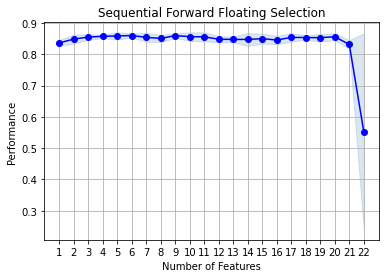

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Floating Selection')
plt.grid()
plt.show()